# NOTE 

In [ ]:
# results in this notebook may be slightly different than report as multiple notebooks
#    over the period of a semester were combined and rerun in this 

In [1]:
import pandas as pd
import seaborn as sea
from pandas import read_csv
from pandas import set_option
from numpy import unique
from matplotlib import pyplot
from numpy import set_printoptions

# read the data and create a data frame
fileName = "/Users/mtjen/Desktop/dsci/SKbike.csv"
bikesDF = read_csv(fileName, encoding = 'unicode_escape')

# see the head of the data
bikesDF.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [2]:
# see the shape of the data
bikesDF.shape

(8760, 14)

In [3]:
# move target feature to end of data frame
col = bikesDF.pop('Rented Bike Count')
bikesDF.insert(13, 'Rented Bike Count', col)
bikesDF.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78


In [4]:
# check if there are any null values
isNullValues = bikesDF.isnull().sum()
print(isNullValues)

Date                         0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Rented Bike Count            0
dtype: int64


In [5]:
# check the data types
types = bikesDF.dtypes
print(types)

Date                          object
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
Rented Bike Count              int64
dtype: object


In [6]:
# replace string values with numerical boolean values
bikesDF = bikesDF.replace(['No Holiday', 'Holiday', 'Winter', 'Spring', 
                           'Summer', 'Autumn', 'No', 'Yes'], 
                          [0, 1, 1, 2, 3, 4, 0, 1])
bikesDF.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,1,254
1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,1,204
2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,1,173
3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,1,107
4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,1,78


In [7]:
# see descriptive statistics
set_option('precision', 2)
bikesDF.describe()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
count,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00
mean,11.50,12.88,58.23,1.72,1436.83,4.07,0.57,0.15,0.08,2.50,0.05,0.97,704.60
std,6.92,11.94,20.36,1.04,608.30,13.06,0.87,1.13,0.44,1.11,0.22,0.18,645.00
min,0.00,-17.80,0.00,0.00,27.00,-30.60,0.00,0.00,0.00,1.00,0.00,0.00,0.00
25%,5.75,3.50,42.00,0.90,940.00,-4.70,0.00,0.00,0.00,2.00,0.00,1.00,191.00
50%,11.50,13.70,57.00,1.50,1698.00,5.10,0.01,0.00,0.00,3.00,0.00,1.00,504.50
75%,17.25,22.50,74.00,2.30,2000.00,14.80,0.93,0.00,0.00,3.00,0.00,1.00,1065.25
max,23.00,39.40,98.00,7.40,2000.00,27.20,3.52,35.00,8.80,4.00,1.00,1.00,3556.00


<AxesSubplot:>

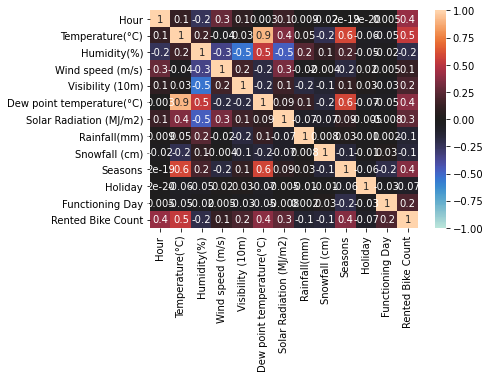

In [8]:
# create a correlation heatmap
sea.heatmap(bikesDF.corr(), annot = True, fmt = '0.1g', vmin = -1, vmax = 1, center = 0)

<AxesSubplot:>

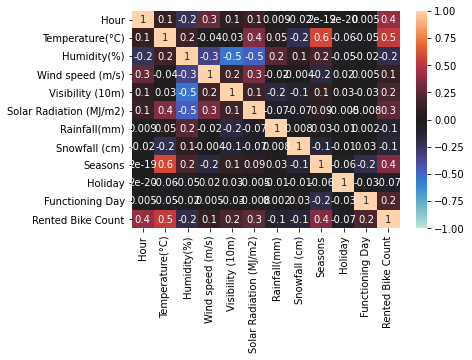

In [9]:
# remove features with high correlation values or provide little value considering other features
bikesDF = bikesDF.drop(columns = ["Date", "Dew point temperature(°C)"])
sea.heatmap(bikesDF.corr(), annot = True, fmt = '0.1g', vmin = -1, vmax = 1, center = 0)

In [10]:
# summarize the percentage of unique values for each feature
for i in range (bikesDF.shape[1]):
    numOccurences = len(unique(bikesDF.iloc[:,i]))
    percent = float(numOccurences) / bikesDF.shape[0] * 100
    print('{}, {}, {}'.format(i, numOccurences, percent))

0, 24, 0.273972602739726
1, 546, 6.232876712328768
2, 90, 1.0273972602739725
3, 65, 0.7420091324200913
4, 1789, 20.422374429223744
5, 345, 3.9383561643835616
6, 61, 0.6963470319634704
7, 51, 0.5821917808219178
8, 4, 0.045662100456621
9, 2, 0.0228310502283105
10, 2, 0.0228310502283105
11, 2166, 24.726027397260275


In [11]:
# get indexes of samples with a Functioning Day value of 0
indexes = bikesDF[~(bikesDF['Functioning Day'] == 1)].index

# drop those samples from the data set
bikesDF.drop(indexes, inplace = True)

# drop the Functioning Day feature
bikesDF = bikesDF.drop(columns = ["Functioning Day"])

bikesDF.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Rented Bike Count
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,0,254
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,204
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,0,173
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,0,107
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,0,78


In [12]:
# see the new shape of the data
bikesDF.shape

(8465, 11)

In [13]:
# see if the data is skewed
bikesDF.skew()

Hour                      -1.26e-03
Temperature(°C)           -1.75e-01
Humidity(%)                6.86e-02
Wind speed (m/s)           8.94e-01
Visibility (10m)          -6.95e-01
Solar Radiation (MJ/m2)    1.51e+00
Rainfall(mm)               1.46e+01
Snowfall (cm)              8.29e+00
Seasons                    3.41e-02
Holiday                    4.22e+00
Rented Bike Count          1.14e+00
dtype: float64

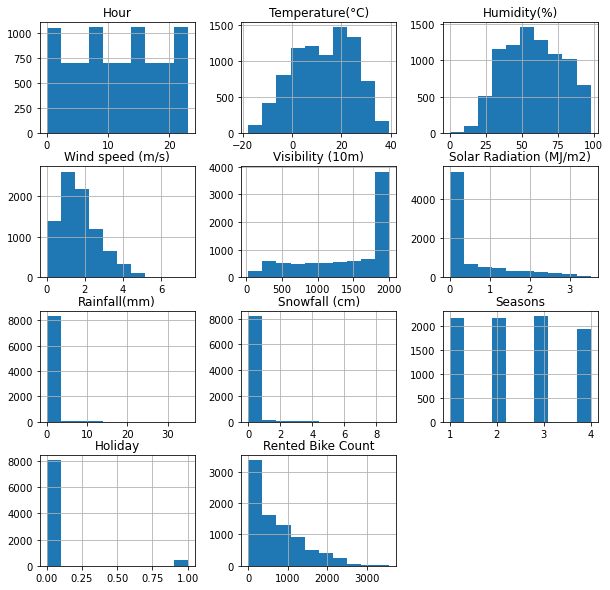

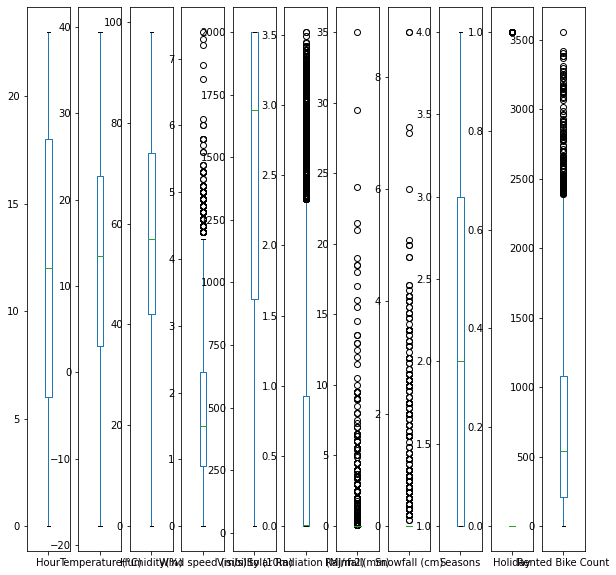

In [14]:
# histogram for value distribution
histogram = bikesDF.hist(figsize = (10,10))

# box plots to see if there are outliers
box = bikesDF.plot(kind = 'box', subplots = True, sharex = False, 
                   sharey = False, figsize = (10,10))

pyplot.show()

# Feature and Algorithm Selection

In [15]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

fileName = "/Users/mtjen/Desktop/dsci/trainingData.csv"
bikesDF = read_csv(fileName, encoding = 'unicode_escape')  
featureNames = ['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 
                'Wind Speed(m/s)', 'Visibility(10m)', 'Dew Point Temperature(°C)', 
                'Solar Radiation(MJ/m2)', 'Rainfall(mm)', 'Snowfall(cm)', 'Season', 
                'Holiday', 'Functioning Day']
bikesDF = read_csv(fileName, encoding = 'unicode_escape', names = featureNames)

# drop the first row with old feature names
bikesDF = bikesDF.iloc[1:]

# move target feature to end of dataframe
col = bikesDF.pop('Rented Bike Count')
bikesDF.insert(13, 'Rented Bike Count', col)

# replace string values with numerical boolean values
bikesDF = bikesDF.replace(['No Holiday', 'Holiday', 'Winter', 'Spring', 
                           'Summer', 'Autumn', 'No', 'Yes'], 
                          [0, 1, 1, 2, 3, 4, 0, 1])

# remove Date and Dew Point Temperature features as it closely correlates with Temperature
bikesDF = bikesDF.drop(columns = ["Date", "Dew Point Temperature(°C)"])

# get indexes of samples with a Functioning Day value of 0
indexes = bikesDF[~(bikesDF['Functioning Day'] == 1)].index

# drop those samples from the data set
bikesDF.drop(indexes , inplace = True)

# drop the Functioning Day feature
bikesDF = bikesDF.drop(columns = ["Functioning Day"])

bikesDF.head()

,Hour,Temperature(°C),Humidity(%),Wind Speed(m/s),Visibility(10m),Solar Radiation(MJ/m2),Rainfall(mm),Snowfall(cm),Season,Holiday,Rented Bike Count
1,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,0,254
2,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,204
3,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,0,173
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,0,78
5,5,-6.4,37,1.5,2000,0.0,0.0,0.0,1,0,100


In [16]:
# Feature Importance 
# smaller values -> less important

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# separate target feature
array = bikesDF.values
X = array[:,0:10]
Y = array[:,10]

# feature extraction using model importance
model = ExtraTreesRegressor()
model.fit(X, Y)
print(model.feature_importances_)

print()

# feature extraction with RFE
model = LogisticRegression()
rfe = RFE(model, 5) 
fit = rfe.fit(X, Y)
print("Num Features: {}".format(fit.n_features_)) 
print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))

[0.32958578 0.23850174 0.11351755 0.02492617 0.03386194 0.07565805
 0.02586938 0.00160972 0.15030866 0.00616102]



/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Num Features: 5
Selected Features: [ True  True  True False  True False False False  True False]
Feature Ranking: [1 1 1 3 1 4 2 5 1 6]


/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# create new dataframes with varying amount of features

fourFeatureDF = bikesDF.drop(columns = ['Hour', 'Solar Radiation(MJ/m2)', 'Rainfall(mm)', 
                                        'Snowfall(cm)', 'Season', 'Holiday'])

fiveFeatureDF = bikesDF.drop(columns = ['Solar Radiation(MJ/m2)', 'Rainfall(mm)', 
                                        'Snowfall(cm)', 'Season', 'Holiday'])

sixFeatureDF =  bikesDF.drop(columns = ['Rainfall(mm)', 'Snowfall(cm)', 'Season', 'Holiday'])

sevenFeatureDF =  bikesDF.drop(columns = ['Rainfall(mm)', 'Snowfall(cm)', 'Holiday'])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

array = fourFeatureDF.values
X = array[:,0:4]
Y = array[:,4]
scoring = 'neg_mean_squared_error' 
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print(results.mean())

print()

array = fiveFeatureDF.values
X = array[:,0:5]
Y = array[:,5]
results = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print(results.mean())

print()

array = sixFeatureDF.values
X = array[:,0:6]
Y = array[:,6] 
results = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print(results.mean())

print()

array = sevenFeatureDF.values
X = array[:,0:7]
Y = array[:,7]
results = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print(results.mean())

print()

array = bikesDF.values
X = array[:,0:10]
Y = array[:,10] 
results = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print(results.mean())

-242628.45019204667

-207890.52066260186

-204796.2321019885

-196065.535995874

-190805.58791396423


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

array = bikesDF.values
X = array[:,0:10]
Y = array[:,10]
kfold = KFold(n_splits = 10, random_state = 7)
scoring = 'neg_mean_squared_error'

model = LinearRegression()
results = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print(results.mean())

print()

model = Ridge()
results = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print(results.mean())

print()

model = Lasso()
results = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print(results.mean())

print()

model = ElasticNet()
results = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print(results.mean())

print()

model = DecisionTreeRegressor()
results = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print(results.mean())

print()

model = SVR()
results = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print(results.mean())

/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


-211325.22523529647

-211319.42184082707

-211133.8100195111

-212304.4078480253

-136526.55506292658

-468956.3739273579


In [20]:
# Create a pipeline that standardizes the data then creates a model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

array = bikesDF.values
X = array[:,0:10]
Y = array[:,10]
scoring = 'r2'
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)

# pipeline
DTRestimator = []
DTRestimator.append(('Standard', StandardScaler()))
DTRestimator.append(('Regressor', DecisionTreeRegressor()))
model = Pipeline(DTRestimator)
results = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print('Decision Tree:',results.mean())

LRestimator = []
LRestimator.append(('Standard', StandardScaler()))
LRestimator.append(('Linear Regression', LinearRegression()))
model = Pipeline(LRestimator)
results = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print('Linear:',results.mean())

Restimator = []
Restimator.append(('Standard', StandardScaler()))
Restimator.append(('Ridge', Ridge()))
model = Pipeline(Restimator)
results = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print('Ridge:',results.mean())

Lestimator = []
Lestimator.append(('Standard', StandardScaler()))
Lestimator.append(('Lasso', Lasso()))
model = Pipeline(Lestimator)
results = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print('Lasso:',results.mean())

Decision Tree: 0.7420871102497638
Linear: 0.5353705511803393
Ridge: 0.535371385634241
Lasso: 0.535344638565112


In [21]:
# Create a pipeline that standardizes the data then creates a model

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

array = bikesDF.values
X = array[:,0:10]
Y = array[:,10]

# pipeline
DTRestimator = []
DTRestimator.append(('Regressor', DecisionTreeRegressor()))
model = Pipeline(DTRestimator)
scoring = 'r2'

kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
results = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
print(results, results.mean())

[0.68724064 0.7192479  0.70388798 0.7497677  0.79638183 0.73145593
 0.76227373 0.77564707 0.76682888 0.73832493] 0.7431056591474374


# Parameter Tuning

In [22]:
# bagged decision tree

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

X = array[:,0:10]
Y = array[:,10]
seed = 7
kfold = KFold(n_splits = 10, random_state = seed, shuffle = True)
cart = DecisionTreeRegressor()
num_trees = 100
model = BaggingRegressor(base_estimator = cart, n_estimators = num_trees, random_state = seed)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8633453392008363


In [23]:
# random forest

from sklearn.ensemble import RandomForestRegressor

X = array[:,0:10]
Y = array[:,10]
num_trees = 100
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
model = RandomForestRegressor(n_estimators = num_trees)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.862764196663816


In [24]:
# extra trees

from sklearn.ensemble import ExtraTreesRegressor

X = array[:,0:10]
Y = array[:,10]
num_trees = 100
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
model = ExtraTreesRegressor(n_estimators = num_trees)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8678602203750092


In [25]:
# ada boost

from sklearn.ensemble import AdaBoostRegressor

X = array[:,0:10]
Y = array[:,10]
num_trees = 100
seed=7
kfold = KFold(n_splits = 10, random_state = seed, shuffle = True)
model = AdaBoostRegressor(n_estimators = num_trees, random_state = seed)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.5530056329861461


In [26]:
# gradient boost

from sklearn.ensemble import GradientBoostingRegressor

X = array[:,0:10]
Y = array[:,10]
seed = 7
num_trees = 100
kfold = KFold(n_splits = 10, random_state = seed, shuffle = True)
model = GradientBoostingRegressor(n_estimators = num_trees, random_state = seed)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8470746801443632


In [27]:
# initial stack of base and ensemble methods

from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

array = bikesDF.values
X = array[:,0:10]
Y = array[:,10]

kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)

modelOne = DecisionTreeRegressor()
modelTwo = ExtraTreesRegressor()

# results for each model
resultsOne = cross_val_score(modelOne, X, Y, cv = kfold, scoring = scoring)
resultsTwo = cross_val_score(modelTwo, X, Y, cv = kfold, scoring = scoring)

print('DTR:', resultsOne.mean() * 100)
print('ETR:', resultsTwo.mean() * 100)

# get the mean of both model scores as a combined performance
meanScore = (resultsOne.mean() + resultsTwo.mean()) / 2
print('Average:', meanScore * 100)

DTR: 74.51182510024809
ETR: 86.89682726959178
Average: 80.70432618491994


In [28]:
# ensemble method tuning

In [29]:
# n estimators parameter

X = array[:,0:10]
Y = array[:,10]
num_trees = 200

kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)

model = ExtraTreesRegressor(n_estimators = num_trees)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8694718187477186


In [30]:
num_trees = 300

model = ExtraTreesRegressor(n_estimators = num_trees)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8689949994554935


In [31]:
num_trees = 500

model = ExtraTreesRegressor(n_estimators = num_trees)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8695500948796981


In [32]:
num_trees = 400

model = ExtraTreesRegressor(n_estimators = num_trees)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8694299028938245


In [33]:
num_trees = 350

model = ExtraTreesRegressor(n_estimators = num_trees)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8695910014887474


In [34]:
num_trees = 450

model = ExtraTreesRegressor(n_estimators = num_trees)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8695697894950902


In [35]:
num_trees = 425

model = ExtraTreesRegressor(n_estimators = num_trees)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8696912108542666


In [36]:
# max features parameter

features = 4

model = ExtraTreesRegressor(n_estimators = 400, max_features = features)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8688579894429816


In [37]:
# max features parameter

features = 7

model = ExtraTreesRegressor(n_estimators = 400, max_features = features)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8707857485532386


In [38]:
# max features parameter

features = 8

model = ExtraTreesRegressor(n_estimators = 400, max_features = features)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8701952630914731


In [39]:
# max features parameter

features = 6

model = ExtraTreesRegressor(n_estimators = 400, max_features = features)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.870871168595474


In [40]:
# max features parameter

features = 5

model = ExtraTreesRegressor(n_estimators = 400, max_features = features)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8705383433927549


In [41]:
# max depth parameter


depth = 10

model = ExtraTreesRegressor(n_estimators = 400, max_features = 7, max_depth = depth)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8423839508693896


In [42]:
depth = 5

model = ExtraTreesRegressor(n_estimators = 400, max_features = 7, max_depth = depth)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.6909918631677122


In [43]:
depth = 20

model = ExtraTreesRegressor(n_estimators = 400, max_features = 7, max_depth = depth)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8714367596815074


In [44]:
depth = 30

model = ExtraTreesRegressor(n_estimators = 400, max_features = 7, max_depth = depth)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.870762287643525


In [45]:
depth = 25

model = ExtraTreesRegressor(n_estimators = 400, max_features = 7, max_depth = depth)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8713331670225388


In [46]:
depth = 15

model = ExtraTreesRegressor(n_estimators = 400, max_features = 7, max_depth = depth)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8716977879230681


In [47]:
depth = 17

model = ExtraTreesRegressor(n_estimators = 400, max_features = 7, max_depth = depth)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8722883413339645


In [48]:
depth = 16

model = ExtraTreesRegressor(n_estimators = 400, max_features = 7, max_depth = depth)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8723111493241623


In [49]:
depth = 18

model = ExtraTreesRegressor(n_estimators = 400, max_features = 7, max_depth = depth)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8724746097742747


In [50]:
# KFold tuning

In [51]:
# n_splits parameter

from sklearn.ensemble import ExtraTreesRegressor

split = 8

kfold = KFold(n_splits = split, random_state = 7, shuffle = True)

model = ExtraTreesRegressor(n_estimators = 400, max_features = 7, max_depth = 17)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8734388483883303


In [52]:
split = 12

kfold = KFold(n_splits = split, random_state = 7, shuffle = True)

model = ExtraTreesRegressor(n_estimators = 400, max_features = 7, max_depth = 17)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8726347965976388


In [53]:
split = 9

kfold = KFold(n_splits = split, random_state = 7, shuffle = True)

model = ExtraTreesRegressor(n_estimators = 400, max_features = 7, max_depth = 17)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8723576959573892


In [54]:
# random state parameter

state = 5

kfold = KFold(n_splits = 8, random_state = state, shuffle = True)

model = ExtraTreesRegressor(n_estimators = 400, max_features = 7, min_samples_leaf = 1,
                            min_samples_split = 2, max_depth = 17)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8743358045960561


In [55]:
state = 9

kfold = KFold(n_splits = 8, random_state = state, shuffle = True)

model = ExtraTreesRegressor(n_estimators = 400, max_features = 7, min_samples_leaf = 1,
                            min_samples_split = 2, max_depth = 17)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8730211686699201


In [56]:
state = 6

kfold = KFold(n_splits = 8, random_state = state, shuffle = True)

model = ExtraTreesRegressor(n_estimators = 400, max_features = 7, min_samples_leaf = 1,
                            min_samples_split = 2, max_depth = 17)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8716793310171316


In [57]:
state = 4

kfold = KFold(n_splits = 8, random_state = state, shuffle = True)

model = ExtraTreesRegressor(n_estimators = 400, max_features = 7, min_samples_leaf = 1,
                            min_samples_split = 2, max_depth = 17)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8710282312482214


In [58]:
# decision tree regressor tuning

In [59]:
# max depth parameter

kfold = KFold(n_splits = 8, random_state = 5, shuffle = True)

depth = 5

model = DecisionTreeRegressor(max_depth = depth)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.7344516558400034


In [60]:
depth = 10

model = DecisionTreeRegressor(max_depth = depth)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8041744401250083


In [61]:
depth = 15

model = DecisionTreeRegressor(max_depth = depth)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.7615473821399309


In [62]:
depth = 8

model = DecisionTreeRegressor(max_depth = depth)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.7986618190784547


In [63]:
depth = 9

model = DecisionTreeRegressor(max_depth = depth)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8077419168012667


In [65]:
# min samples split parameter

split = 5

model = DecisionTreeRegressor(max_depth = 9, min_samples_split = split)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8066445813096238


In [66]:
split = 10

model = DecisionTreeRegressor(max_depth = 9, min_samples_split = split)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8100282030074568


In [67]:
split = 15

model = DecisionTreeRegressor(max_depth = 9, min_samples_split = split)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8120799380346565


In [68]:
split = 20

model = DecisionTreeRegressor(max_depth = 9, min_samples_split = split)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8129159275780268


In [69]:
split = 25

model = DecisionTreeRegressor(max_depth = 9, min_samples_split = split)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8141299371934386


In [70]:
split = 30

model = DecisionTreeRegressor(max_depth = 9, min_samples_split = split)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8139623832957894


In [71]:
split = 35

model = DecisionTreeRegressor(max_depth = 9, min_samples_split = split)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.813821754962228


In [72]:
split = 40

model = DecisionTreeRegressor(max_depth = 9, min_samples_split = split)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8129999935332544


In [73]:
split = 37

model = DecisionTreeRegressor(max_depth = 9, min_samples_split = split)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8136230801163018


In [74]:
split = 33

model = DecisionTreeRegressor(max_depth = 9, min_samples_split = split)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8139997781796262


In [75]:
split = 34

model = DecisionTreeRegressor(max_depth = 9, min_samples_split = split)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8137786665205955


In [76]:
split = 36

model = DecisionTreeRegressor(max_depth = 9, min_samples_split = split)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8143679462224028


In [77]:
# max features parameter

feat = 5

model = DecisionTreeRegressor(max_depth = 9, min_samples_split = 36, max_features = feat)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.7888405853936363


In [78]:
feat = 8

model = DecisionTreeRegressor(max_depth = 9, min_samples_split = 36, max_features = feat)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8142666661128503


In [79]:
feat = 10

model = DecisionTreeRegressor(max_depth = 9, min_samples_split = 36, max_features = feat)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8143679462224028


In [80]:
feat = 9

model = DecisionTreeRegressor(max_depth = 9, min_samples_split = 36, max_features = feat)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8073441065459858


In [81]:
feat = 7

model = DecisionTreeRegressor(max_depth = 9, min_samples_split = 36, max_features = feat)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.8098646366063517


In [82]:
# tuned stack of base and ensemble methods

array = bikesDF.values
X = array[:,0:10]
Y = array[:,10]

kfold = KFold(n_splits = 8, random_state = 5, shuffle = True)

modelOne = DecisionTreeRegressor(max_depth = 9, min_samples_split = 36, max_features = 9)
modelTwo = ExtraTreesRegressor(n_estimators = 400, max_features = 7, min_samples_leaf = 1,
                            min_samples_split = 2, max_depth = 17)

# results for each model
resultsOne = cross_val_score(modelOne, X, Y, cv = kfold, scoring = scoring)
resultsTwo = cross_val_score(modelTwo, X, Y, cv = kfold, scoring = scoring)

print('DTR:', resultsOne.mean() * 100)
print('ETR:', resultsTwo.mean() * 100)

# get the mean of both model scores as a combined performance
meanScore = (resultsOne.mean() + resultsTwo.mean()) / 2
print('Average:', meanScore * 100)

DTR: 81.15390642842087
ETR: 87.3421769852915
Average: 84.24804170685618


# Holdout Data Testing

In [83]:
# prepare holdout data for testing

import pandas as pd
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import StackingRegressor

# read data
testName = "/Users/mtjen/Desktop/dsci/testData.csv"
featureNames = ['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 
                'Wind Speed(m/s)', 'Visibility(10m)', 'Dew Point Temperature(°C)', 
                'Solar Radiation(MJ/m2)', 'Rainfall(mm)', 'Snowfall(cm)', 'Season', 
                'Holiday', 'Functioning Day']
testDF = read_csv(testName, encoding = 'unicode_escape', names = featureNames)

# drop the first row with old feature names
testDF = testDF.iloc[1:]

# move target feature to end of dataframe
testCol = testDF.pop('Rented Bike Count')
testDF.insert(13, 'Rented Bike Count', testCol)

# replace string values with numerical boolean values
testDF = testDF.replace(['No Holiday', 'Holiday', 'Winter', 'Spring', 
                           'Summer', 'Autumn', 'No', 'Yes'], 
                          [0, 1, 1, 2, 3, 4, 0, 1])

# remove Date and Dew Point Temperature features as it closely correlates with Temperature
testDF = testDF.drop(columns = ["Date", "Dew Point Temperature(°C)"])

# get indexes of samples with a Functioning Day value of 0
testIndex = testDF[~(testDF['Functioning Day'] == 1)].index

# drop those samples from the data set
testDF.drop(testIndex, inplace = True)

# drop the functioning day feature
testDF = testDF.drop(columns = ["Functioning Day"])

testDF.head()

,Hour,Temperature(°C),Humidity(%),Wind Speed(m/s),Visibility(10m),Solar Radiation(MJ/m2),Rainfall(mm),Snowfall(cm),Season,Holiday,Rented Bike Count
1,16,34.1,52,2.5,1304,2.23,0.0,0.0,3,0,977
2,0,20.9,53,1.4,1717,0.0,0.0,0.0,3,0,1165
3,3,13.0,0,0.8,2000,0.0,0.0,0.0,2,0,165
4,4,25.9,71,0.3,2000,0.0,0.0,0.0,3,0,270
5,19,8.4,53,1.0,2000,0.0,0.0,0.0,4,0,1507


In [86]:
# prepare data for modeling
testArray = testDF.values

xTest = testArray[:,0:10]
yTest = testArray[:,10]

kfold = KFold(n_splits = 8, random_state = 5, shuffle = True)

# sub models
modelOne = DecisionTreeRegressor(max_depth = 9, min_samples_split = 36, max_features = 9)
modelTwo = ExtraTreesRegressor(n_estimators = 400, max_features = 7, min_samples_leaf = 1,
                            min_samples_split = 2, max_depth = 17)

# fit the data
modelOne.fit(X, Y)
modelTwo.fit(X, Y)

# score each model seperately
scoreOne = modelOne.score(xTest, yTest)
scoreTwo = modelTwo.score(xTest, yTest)

# get the mean of both model scores as a combined performance
meanScore = (scoreOne + scoreTwo) / 2
print(meanScore * 100)

85.23329474119967
